In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
import warnings
warnings.filterwarnings(action='ignore')


In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [29]:
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text

In [30]:
###Read stocktwits data for Amazon. The ML model predicts the sentiments of messages in this dataset, for the period of 2019-07-21 to 2020-07-22

df1=pd.read_csv("AMZN_label.csv")
df1= df1.dropna(subset=['message']).reset_index()  

###Read financial corpus data. The ML model will train and test based on the data in this dataset
fin_corpus=pd.read_csv("tweet_sentiment.csv")

In [145]:

stocktwits_data = df1[['symbol', 'message', 'Date']]
stocktwits_data['Date'] = pd.to_datetime(stocktwits_data['Date'])

stocktwits_data = stocktwits_data[stocktwits_data['Date'] > '2020-03-01']
stocktwits_data = stocktwits_data[stocktwits_data['Date'] < '2020-05-01']

In [146]:
stocktwits_data.tail(5)

,symbol,message,Date
50674,AMZN,spy tsla amzn baba,2020-03-02
50675,AMZN,viruses coming mail till start uv disinfecting...,2020-03-02
50676,AMZN,amzn futures jumped 200,2020-03-02
50677,AMZN,aapl fb amzn someone pls explain relationship ...,2020-03-02
50678,AMZN,amzn better futures start rebound 30k less 20 ...,2020-03-02


In [33]:
fin_corpus.rename(columns={'cleaned_tweets': 'text', 'sentiment': 'sentiment'}, inplace=True)
fin_corpus.head(5)

,text,sentiment
0,video offic mind busi david solomon tell gs in...,0
1,price lumber lb f sinc hit ytd high maci turna...,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict ...,1
4,satellit avoid attack space junk circl earth paid,-1


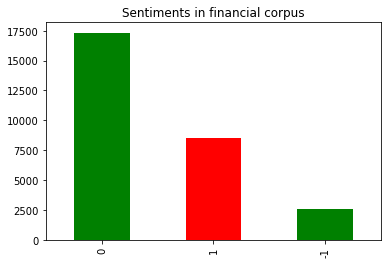

In [34]:
fin_corpus['sentiment'].value_counts().plot.bar(color = ["g","r"])
plt.title('Sentiments in financial corpus')
plt.show()

In [35]:
fin_corpus['sentiment'].value_counts()

 0    17330
 1     8512
-1     2598
Name: sentiment, dtype: int64

In [36]:
##fin_corpus.drop(fin_corpus.loc[fin_corpus['sentiment']==0].index, inplace=True)

fin_corpus["sentiment"].replace({1: "Positive"}, inplace=True)
fin_corpus["sentiment"].replace({0: "Neutral"}, inplace=True)
fin_corpus["sentiment"].replace({-1: "Negative"}, inplace=True)

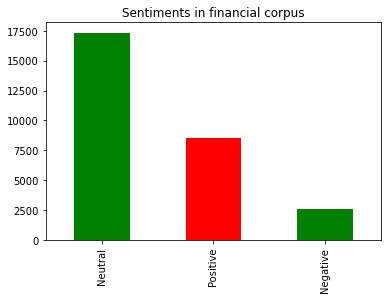

In [37]:
fin_corpus['sentiment'].value_counts().plot.bar(color = ["g","r"])
plt.title('Sentiments in financial corpus')
plt.show()

In [38]:
fin_corpus['sentiment'].value_counts()

Neutral     17330
Positive     8512
Negative     2598
Name: sentiment, dtype: int64

In [39]:
train_data = fin_corpus
train_data = train_data.dropna()
train_data['sentiment'].value_counts()
##train_data["sentiment"].replace({1: 2}, inplace=True)
##train_data["sentiment"].replace({0: 1}, inplace=True)
##train_data["sentiment"].replace({-1: 0}, inplace=True)
##train_data['sentiment'].value_counts()
#train_data = train_data.sample(frac=1)
##train_data

Neutral     17324
Positive     8512
Negative     2598
Name: sentiment, dtype: int64

In [40]:
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

#print('Before cleaning:')
#train_data['text'][0]

In [41]:
# Create a new column with the cleaned messages
train_data['text_clean'] = train_data['text'].apply(lambda string: clean_str(string))

# Display the result
train_data.head()

,text,sentiment,text_clean
0,video offic mind busi david solomon tell gs in...,Neutral,video offic mind busi david solomon tell gs in...
1,price lumber lb f sinc hit ytd high maci turna...,Neutral,price lumber lb f sinc hit ytd high maci turna...
2,say american dream dead,Negative,say american dream dead
3,barri silbert extrem optimist bitcoin predict ...,Positive,barri silbert extrem optimist bitcoin predict ...
4,satellit avoid attack space junk circl earth paid,Negative,satellit avoid attack space junk circl earth paid


In [42]:
import nltk
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
encoder = preprocessing.LabelEncoder()
from imblearn.under_sampling import RandomUnderSampler
##encoder = preprocessing.LabelEncoder()

y = train_data.sentiment
x = train_data.text_clean


In [43]:
# TFIDF feature generation for a maximum of 5000 features
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(train_data['text_clean'])
x = tfidf_vect.transform(x)
##X_test = tfidf_vect.transform(X_test)
##xtrain_tfidf.data

In [44]:
##y = train_data.sentiment
##x = train_data.text_clean
##X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [45]:
##y = train_data.sentiment
##x = train_data.text_clean

##Label Encoding
encoder.fit(y)
y = encoder.fit_transform(y)

# SMOTE to handle class imbalance problem
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

##X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=17324 (33.333%)
Class=0, n=17324 (33.333%)
Class=2, n=17324 (33.333%)


In [47]:
x

<51972x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 577281 stored elements in Compressed Sparse Row format>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [49]:
##SVM with gridsearchcv
from sklearn.svm import LinearSVC
from sklearn.mode
l_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
##svc = SVC(C=1.0, random_state=1, kernel='linear')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.7min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.8min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.9min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.9min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.9min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 2.5min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 2.6min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 2.6min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 2.6min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 2.6min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time= 1.8min
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time= 7.8min
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time= 7.8min
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time= 8.2min
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time= 8.2min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 7.9min
[CV] END ......................C=1, gamma=0.001, kernel=rbf; total time=429.0min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 8.0min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 8.1min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 5.7min
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time= 2.5min
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time= 2.8min
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time= 2.6min
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time= 6.7min
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time= 6.7min
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time= 2.0min
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time= 2.3min
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time= 1.9min
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time= 2.1min
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time= 1.9min
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time= 2.3min
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=21.5min
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  47.5s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time= 1.2min
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time= 2.1min
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [50]:
print(grid.best_estimator_)

SVC(C=100, gamma=1)


In [51]:
svc_pred = grid.predict(X_test)

0.9905723905723905
***************************************
Confusion matrix


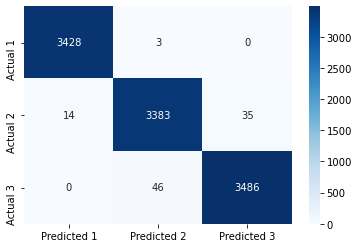

****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3431
           1       0.99      0.99      0.99      3432
           2       0.99      0.99      0.99      3532

    accuracy                           0.99     10395
   macro avg       0.99      0.99      0.99     10395
weighted avg       0.99      0.99      0.99     10395



In [52]:
print(metrics.accuracy_score(y_test,svc_pred))
print('***************************************')
print('Confusion matrix')
svm_cfm=metrics.confusion_matrix(y_test, svc_pred)


lbl1=["Predicted 1", "Predicted 2","Predicted 3"]##,'Predicted 4']
lbl2=["Actual 1", "Actual 2","Actual 3"]##,"Actual 4"]

sns.heatmap(svm_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('****************************************')
print(metrics.classification_report(y_test,svc_pred))